**Data Visualization - Prepared and Compiled by Joseph Leung, Samuel Hsiung and Gabriel Smith** <br>
<br> &emsp;1. General Characteristics of Company Profiles
<br> &emsp;2. Marketsizes and Distributions
<br> &emsp;3. Sectors and Industry Splits
<br> &emsp;4. Geography and Divisions
<br> &emsp;5. Misc. Numerical Visuals


In [1]:
import google
import numpy as np
import pandas as pd
# from google.colab import files
# from google.colab import drive
from matplotlib import pyplot as plt
import re
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
#drive.mount('/gdrive')
#uploaded = files.upload() 

In [2]:
sns.set()

In [5]:
data = pd.read_csv('dataproject_interest.csv')

# General Company Characteristics
As we are mainly interested in the relationship between a CEO's status and the overall performance of a company, it makes sense to see the distribution of deterministic factors of a company's success in general as compared to those with ranked CEOs, whether on Glassdoor, HBR, or both. However, the plots quickly reveal that there seems to be little significant difference between the overall structure of the Foturne 1000 companies compared to when focusing on well-ranked CEOs. While there are obviously less companies and thus it is harder to draw out a distribution, the only advantage that a ranked CEO seems to provide is positive profits. Of course, it is evident that we also suffer from a small sample bias, as only a total of 50 CEOs are ranked on the Fortune 1000 list.

This leads us to ask a number of questions, as perhaps reverse causality is what we are really discovering. Perhaps it is different aspects of a company to make the CEO's good standing. One way to see if this question has any merit is to segment the number of ranked CEOs by different topics such as company size, work sector, and geographical division. While we will eventually use logistical regression analysis to answer this more thoroughly, data visualizations can give us a hint as to what to look for.

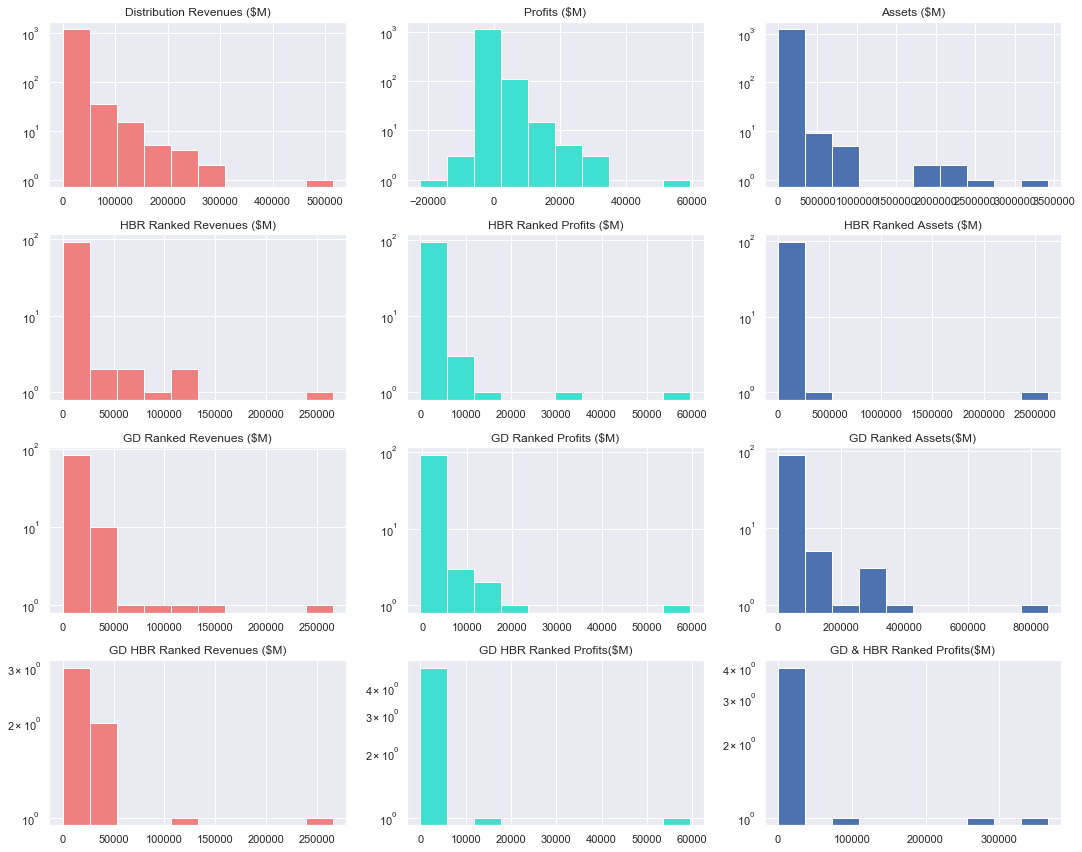

In [6]:
fig , ax = plt.subplots(4,3, figsize = (15,12))

ax[0,0].hist(data['Revenues ($M)'], log = True, color = "lightcoral")
ax[0,0].set_title('Distribution Revenues ($M)')

ax[0,1].hist(data['Profits ($M)'], log=True,color = "turquoise")
ax[0,1].set_title('Profits ($M)')

ax[0,2].hist(data['Assets ($M)'],log = True)
ax[0,2].set_title('Assets ($M)')

ax[1,0].hist(data[data['HBR Ranked'] == 1]['Revenues ($M)'], log=True, color = "lightcoral")
ax[1,0].set_title('HBR Ranked Revenues ($M)')

ax[2,0].hist(data[data['GD Ranked'] == 1]['Revenues ($M)'], log=True, color = "lightcoral")
ax[2,0].set_title('GD Ranked Revenues ($M)')

ax[1,1].hist(data[data['HBR Ranked'] == 1]['Profits ($M)'], log=True,color = "turquoise")
ax[1,1].set_title('HBR Ranked Profits ($M)')

ax[2,1].hist(data[data['GD Ranked'] == 1]['Profits ($M)'], log=True,color = "turquoise")
ax[2,1].set_title('GD Ranked Profits ($M)')

ax[1,2].hist(data[data['HBR Ranked'] == 1]['Assets ($M)'],log = True)
ax[1,2].set_title('HBR Ranked Assets ($M)')

ax[2,2].hist(data[data['GD Ranked'] == 1]['Assets ($M)'],log = True)
ax[2,2].set_title('GD Ranked Assets($M)')

ax[3,0].hist(data[data['GD & HBR Ranked'] == 1]['Revenues ($M)'],log = True, color = "lightcoral")
ax[3,0].set_title('GD HBR Ranked Revenues ($M)')

ax[3,1].hist(data[data['GD & HBR Ranked'] == 1]['Profits ($M)'],log = True,color = "turquoise")
ax[3,1].set_title('GD HBR Ranked Profits($M)')

ax[3,2].hist(data[data['GD & HBR Ranked'] == 1]['Assets ($M)'],log = True)
ax[3,2].set_title('GD & HBR Ranked Profits($M)')
plt.tight_layout()
plt.show()

# Marketsize
The following graphs below show a bar chart of the number of CEOs per company size, as measured by the Market Capitilization. In general, companies on the Fortune 1000 are sizable, but ranked CEOs are often in charge of very large companies. CEOs which appear on both the HBR and Glassdoor top 100 CEOs of 2019, though few, are only in charge of the largest segment of companies.

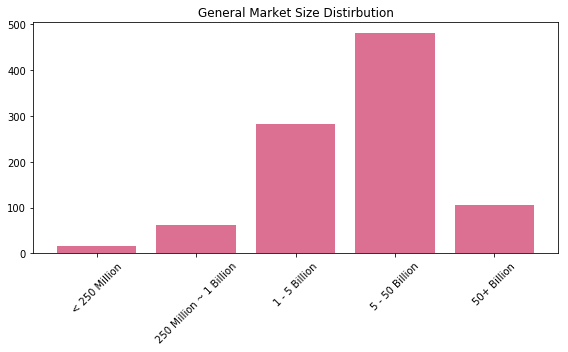

In [21]:
marketsizes = data.filter(regex='^MarketSize',axis=1).sum()
clist = "plum m mediumvioletred palevioletred".split()
fig ,ax = plt.subplots(1,figsize = (8,5))
ax.bar(marketsizes.index, [data[data[i] == 1]['HBR Ranked'].sum() for i in marketsizes.index],color = clist[0])
ax.bar(marketsizes.index, [data[data[i] == 1]['GD Ranked'].sum() for i in marketsizes.index],color = clist[1])
ax.bar(marketsizes.index, [data[data[i] == 1]['GD & HBR Ranked'].sum() for i in marketsizes.index],color = clist[2])
ax.bar(marketsizes.index, marketsizes.values,color = clist[3])

title_list = ["Marketsize for HBR Ranked Companies","Marketsize for GD Ranked Companies","Marketsize for HBR & GD Ranked Companies","General Market Size Distirbution" ]

# for i in range(4):
ax.set_xticklabels(labels = ["< 250 Million","250 Million ~ 1 Billion","1 - 5 Billion","5 - 50 Billion","50+ Billion"],rotation=45)
ax.set_title(title_list[i])
plt.tight_layout()
plt.show()

#Sectors 
We now segment by the different sectors a company is in.This does not seem to be as revealing, as while our bar charts suggest more ranked CEOs would be found Technology or Financial companies, that is also something we see in the general scale of all Fortune 1000 companies. Though a regression analysis would tell us for sure, we can intuit that the sector is not extremely significant in whether a CEO would be ranked or not. At most, it is a variable to simply be controled for.

In [12]:
sectors = ['Aerospace & Defense', 'Apparel', 'Business Services', 'Chemicals',
       'Energy', 'Engineering & Construction', 'Financials',
       'Food & Drug Stores', 'Food, Beverages & Tobacco', 'Health Care',
       'Hotels, Restaurants & Leisure', 'Household Products', 'Industrials',
       'Materials', 'Media', 'Motor Vehicles & Parts', 'Retailing',
       'Technology', 'Telecommunications', 'Transportation', 'Wholesalers']
market_sectors = data[sectors].sum()

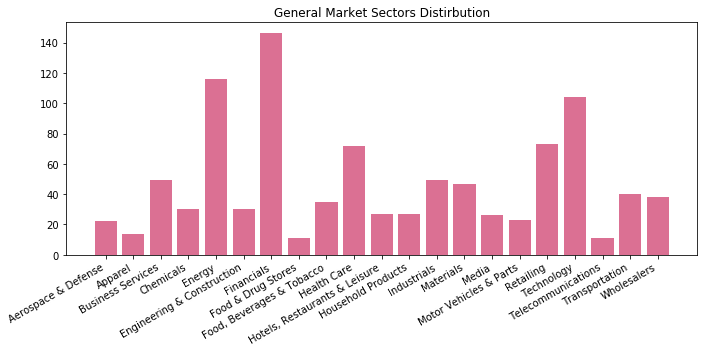

In [19]:
clist = "plum m mediumvioletred palevioletred".split()
fig ,ax = plt.subplots(1,figsize = (10,5))
#ax[0].bar(market_sectors.index, [data[data[i] == 1]['HBR Ranked'].sum() for i in market_sectors.index],color = clist[0])
#ax[1].bar(market_sectors.index, [data[data[i] == 1]['GD Ranked'].sum() for i in market_sectors.index],color = clist[1])
#ax[2].bar(market_sectors.index, [data[data[i] == 1]['GD & HBR Ranked'].sum() for i in market_sectors.index],color = clist[2])
ax.bar(market_sectors.index, market_sectors.values,color = clist[3])

title_list = ["Sectors for HBR Ranked Companies","Sectors for GD Ranked Companies","Sectors for HBR & GD Ranked Companies","General Market Sectors Distirbution" ]

# for i in range(4):
ax.set_xticklabels(labels = sectors,rotation=30, ha='right')
ax.set_title(title_list[i])
plt.tight_layout()
plt.show()

# Geographic Regions
At this point it is clear that we have at least identified good variables to control for. Nonetheless, something interesting about the geographical regions is that though Fortune 1000 companies are generally skewed towards what could be considered as more metropolitan areas, it seems that an disproportionate amount of ranked CEOs come from the west coast and the pacific, even though those areas do not contain the most Fortune 1000 companies. This does seem to offer evidence that certain features may contribute more to a CEO being ranked rather than the contrary. 

Intuitively this makes sense: many large companies exist all throughout the United States, but those that tend to receive the most attention today are those focused on technology products that are often found in the Pacific division. This aligns with the graphs previously seen looking at the sectors as technology companies seemed to be more fortuitous in having ranked CEOs. By observing these data visualizations, we see that it is possible that simply having a big company in the right industry and geographical location will increase the chance of your CEO being well-ranked.

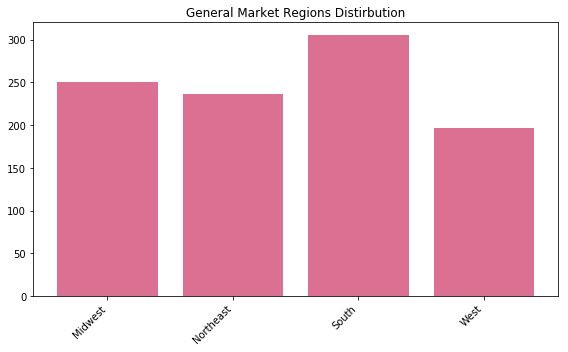

In [22]:
region = ['Midwest', 'Northeast', 'South', 'West']
market_regions = data[region].sum()

clist = "plum m mediumvioletred palevioletred".split()
fig ,ax = plt.subplots(1,figsize = (8,5))
ax.bar(market_regions.index, [data[data[i] == 1]['HBR Ranked'].sum() for i in market_regions.index],color = clist[0])
ax.bar(market_regions.index, [data[data[i] == 1]['GD Ranked'].sum() for i in market_regions.index],color = clist[1])
ax.bar(market_regions.index, [data[data[i] == 1]['GD & HBR Ranked'].sum() for i in market_regions.index],color = clist[2])
ax.bar(market_regions.index, market_regions.values,color = clist[3])

title_list = ["Regions for HBR Ranked Companies","Regions for GD Ranked Companies","Regions for HBR & GD Ranked Companies","General Market Regions Distirbution" ]

# for i in range(4):
ax.set_xticklabels(labels = region,rotation=45, ha='right')
ax.set_title(title_list[i])
plt.tight_layout()
plt.show()

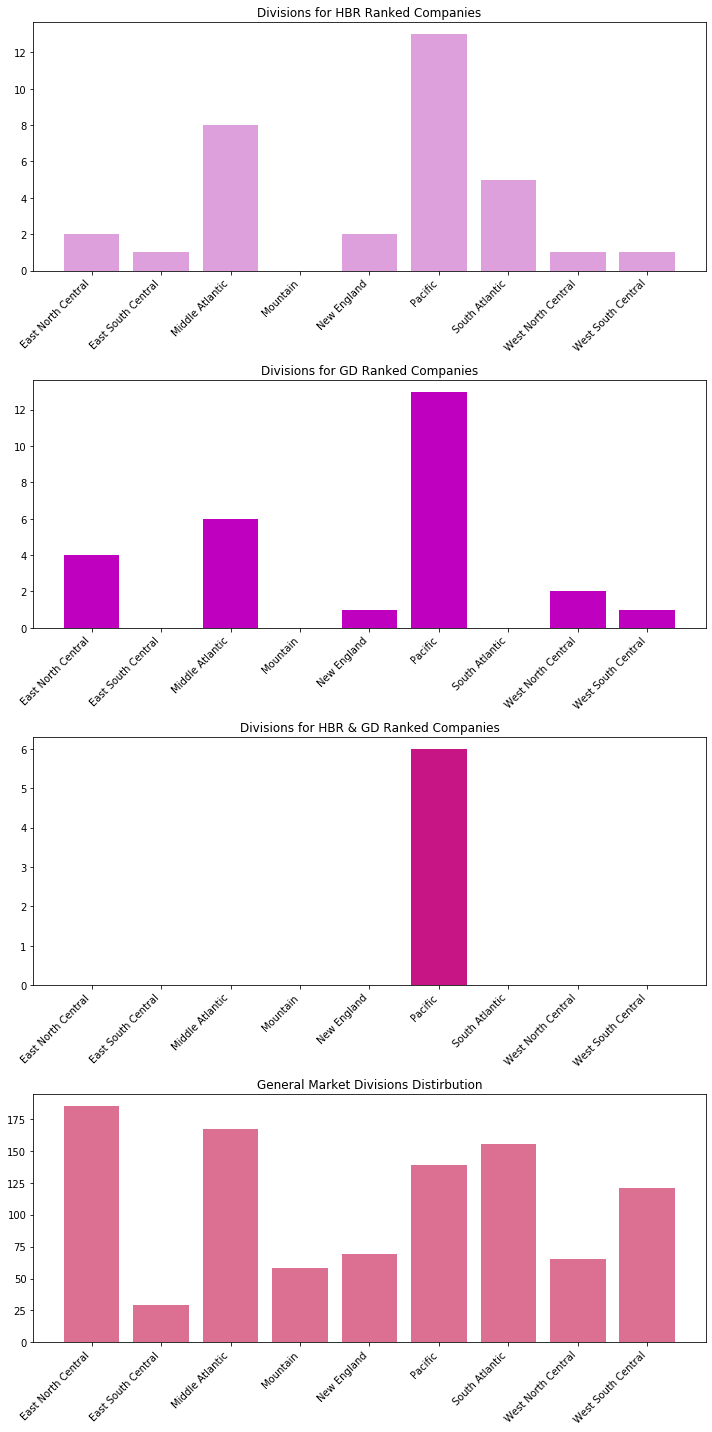

In [0]:
division = [ 'East North Central', 'East South Central', 'Middle Atlantic',
       'Mountain', 'New England', 'Pacific', 'South Atlantic',
       'West North Central', 'West South Central']
market_divisions = data[division].sum()

clist = "plum m mediumvioletred palevioletred".split()
fig ,ax = plt.subplots(4,figsize = (10,20))
ax[0].bar(market_divisions.index, [data[data[i] == 1]['HBR Ranked'].sum() for i in market_divisions.index],color = clist[0])
ax[1].bar(market_divisions.index, [data[data[i] == 1]['GD Ranked'].sum() for i in market_divisions.index],color = clist[1])
ax[2].bar(market_divisions.index, [data[data[i] == 1]['GD & HBR Ranked'].sum() for i in market_divisions.index],color = clist[2])
ax[3].bar(market_divisions.index, market_divisions.values,color = clist[3])

title_list = ["Divisions for HBR Ranked Companies","Divisions for GD Ranked Companies","Divisions for HBR & GD Ranked Companies","General Market Divisions Distirbution" ]

for i in range(4):
  ax[i].set_xticklabels(labels = division,rotation=45, ha='right')
  ax[i].set_title(title_list[i])
plt.tight_layout()
plt.show()

# Beyond CEO rankings

As previously mentioned, an official statistical test will give us a better understanding of the effect of a CEO on a company, but as of yet it seems that if anything, it is the other way around. Of course, these observations are flawed due to a limited number of samples and a restrictive way to recognize a CEO's influence. We now take time to observe other details in our data, namely more information pertaining to the board members of a company.

Our initial prior was that things such as the diversity of the board members may be indicative of the performance of a company. Business intuition would suggest that diversity and other factors would demonstrate openness and a flexibility of ideas, leading to better quality. However, as we have seen with the CEOs, the effect of the top leadership may not influence the company as much as the company may influence the makings of the top leadership. With the visualizations below, beginning with the percentage of women on the board membership, we try and see if these ideas have any foundation.

/Users/gabrielsmith/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/gabrielsmith/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


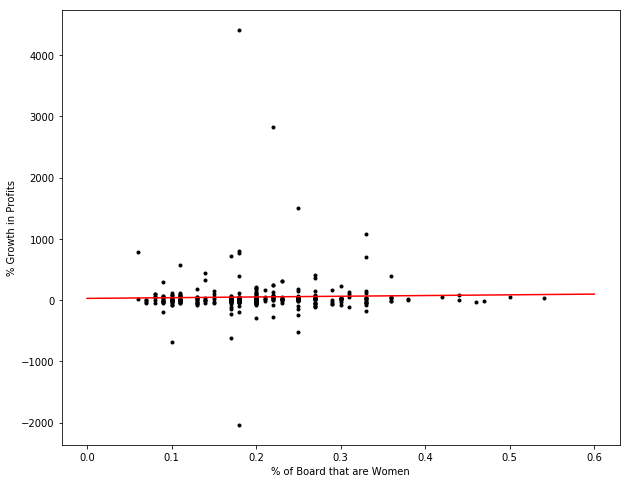

In [28]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
data = data[data['employees'] < 1000000]
X = data["women_on_board"][(data["women_on_board"] > 0) * (data["Profits ($M)Growth"] != 0)]
Y = data["Distribution Revenu"][(data["women_on_board"] > 0) * (data["Profits ($M)Growth"] != 0)]

results = sm.OLS(Y,sm.add_constant(X)).fit()
plt.figure(figsize=(10,8))
plt.scatter(X,Y,marker = ".",color = "black")
plt.xlabel("% of Board that are Women")
plt.ylabel("% Growth in Profits")

X_plot = np.linspace(0,0.6,100)
plt.plot(X_plot, X_plot*results.params[1] + results.params[0], color = "red")

plt.show()

/Users/gabrielsmith/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/gabrielsmith/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


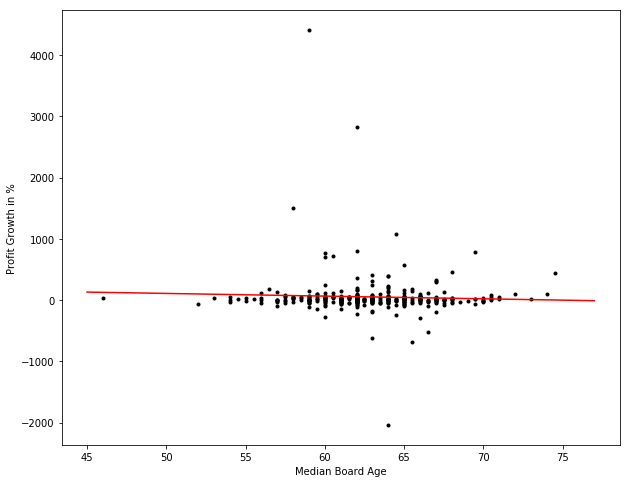

In [24]:
X = data["Median_age"][(data["Median_age"] > 0) * (data["Profits ($M)Growth"] != 0)]
Y = data["Profits ($M)Growth"][(data["Median_age"] > 0) * (data["Profits ($M)Growth"] != 0)]

results = sm.OLS(Y,sm.add_constant(X)).fit()
plt.figure(figsize=(10,8))
plt.scatter(X,Y,marker = ".",color = "Black")
X_plot = np.linspace(45,77,100)
plt.plot(X_plot, X_plot*results.params[1] + results.params[0], color = "Red")
plt.xlabel("Median Board Age")
plt.ylabel("Profit Growth in %")
plt.show()

/Users/gabrielsmith/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/gabrielsmith/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


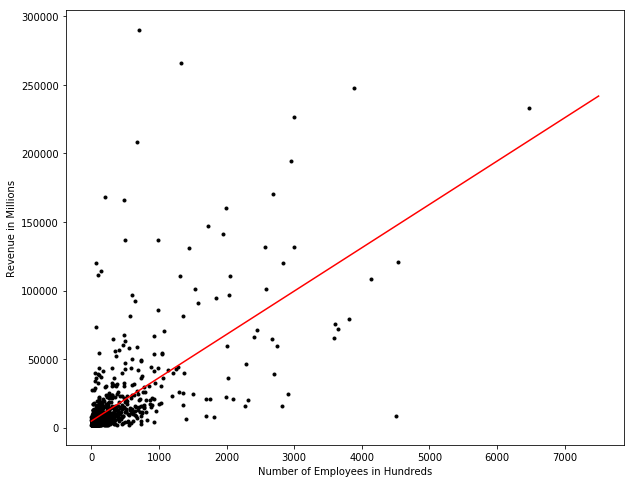

In [26]:
X = data["employees"][(data["employees"] > 0) * (data["Revenues ($M)"] != 0)].apply(lambda x: x/100)
Y = data["Revenues ($M)"][(data["employees"] > 0) * (data["Revenues ($M)"] != 0)]

results = sm.OLS(Y,sm.add_constant(X)).fit()
plt.figure(figsize=(10,8))
plt.scatter(X,Y,marker = ".",color = "Black")
X_plot = np.linspace(0,7500,100)
plt.plot(X_plot, X_plot*results.params[1] + results.params[0], color = "Red")
plt.ylabel("Revenue in Millions")
plt.xlabel("Number of Employees in Hundreds")
plt.show()

/Users/gabrielsmith/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/gabrielsmith/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


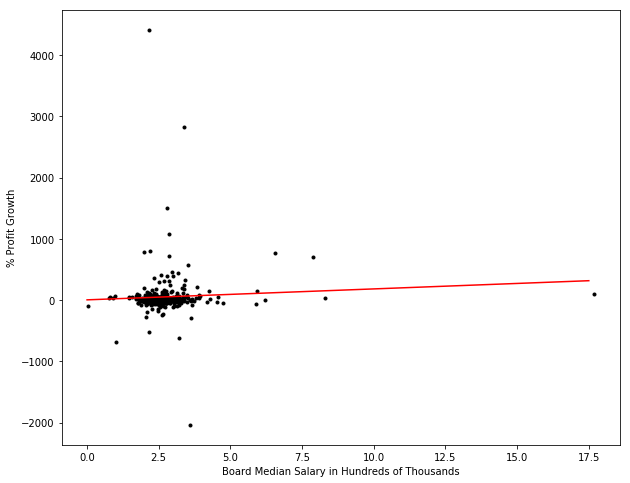

In [37]:
X = data["Median_pay"][(data["Median_pay"] > 0) * (data["Profits ($M)Growth"] != 0)].apply(lambda x: x/100000)
Y = data["Profits ($M)Growth"][(data["Median_pay"] > 0) * (data["Profits ($M)Growth"] != 0)]

results = sm.OLS(Y,sm.add_constant(X)).fit()
plt.figure(figsize=(10,8))
plt.scatter(X,Y,marker = ".",color = "Black")
X_plot = np.linspace(0,17.5,100)
plt.plot(X_plot, X_plot*results.params[1] + results.params[0], color = "Red")
plt.xlabel("Board Median Salary in Hundreds of Thousands")
plt.ylabel("% Profit Growth")

plt.show()

From these regression fits we dont strike much statistical significance, but do see some evidence that board member data may be something interesting to analyze. The exact measurement of company performance is still uncertain, but that does not distract from the fact that a company's board's diversity or salary may influence the effectiveness of a company, or vice-versa.